# Mask and Social distancing Detection

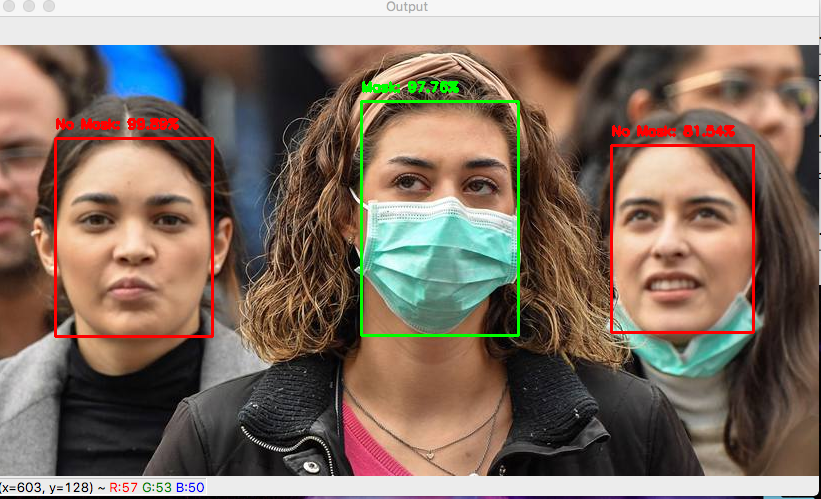

**Social distancing**, also called **“physical distancing,”** means keeping a safe space between yourself and other people who are not from your household.

To practice social or physical distancing, stay at least 6 feet (about 2 arm lengths) from other people who are not from your household in both indoor and outdoor spaces.

**Objective** is to build a Deep Learning model which can identify if the person is wearing a mask or not, also detecting if people vilating social distancing norms.

In [ ]:
import numpy as np # NumericalPython- used for numerical computations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 #OpenCV library, which is commonly used for computer vision and image processing.
from scipy.spatial import distance # spatial distance calculations
#to measure how far apart two points or objects are in a given space


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Using haar cascade to detect faces

Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images. We'll be using a Haar Cascade Model trained to detect faces in order to obtain the bounding box coordinates of faces in an image.

 Haar Cascade Model is used to detect faces in the input image. The code snippet that performs face detection

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d lalitharajesh/haarcascades
!unzip /content/haarcascades.zip

  0% 0.00/1.45M [00:00<?, ?B/s]
100% 1.45M/1.45M [00:00<00:00, 114MB/s]
Archive:  /content/haarcascades.zip
  inflating: haarcascade_eye.xml     
  inflating: haarcascade_eye_tree_eyeglasses.xml  
  inflating: haarcascade_frontalcatface.xml  
  inflating: haarcascade_frontalcatface_extended.xml  
  inflating: haarcascade_frontalface_alt.xml  
  inflating: haarcascade_frontalface_alt2.xml  
  inflating: haarcascade_frontalface_alt_tree.xml  
  inflating: haarcascade_frontalface_default.xml  
  inflating: haarcascade_fullbody.xml  
  inflating: haarcascade_lefteye_2splits.xml  
  inflating: haarcascade_licence_plate_rus_16stages.xml  
  inflating: haarcascade_lowerbody.xml  
  inflating: haarcascade_profileface.xml  
  inflating: haarcascade_righteye_2splits.xml  
  inflating: haarcascade_russian_plate_number.xml  
  inflating: haarcascade_smile.xml   
  inflating: haarcascade_upperbody.xml  


In [ ]:
#loading haarcascade_frontalface_default.xml
face_model = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d andrewmvd/face-mask-detection
!unzip /content/face-mask-detection.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 97% 384M/398M [00:04<00:00, 88.2MB/s]
100% 398M/398M [00:04<00:00, 86.7MB/s]
Archive:  /content/face-mask-detection.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  
  inflating: annotations/maksssksksss11.xml  
  inflating: annotations/maksssksksss110.xml  
  inflating: annotations/maksssksksss111.xml  
  inflating: annotations/maksssksksss112.xml  
  inflating: annotations/m

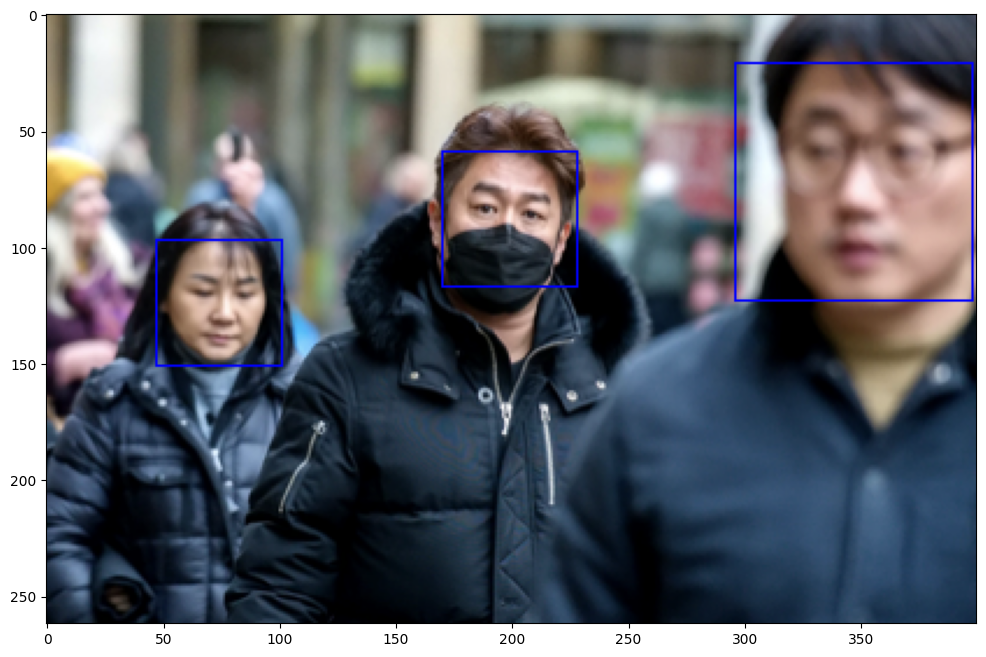

In [ ]:
import matplotlib.pyplot as plt
#trying it out on a sample image
img = cv2.imread('/content/images/maksssksksss244.png')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples

#colored outputimage
out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

### Detecting social distancing violations

This can be done by iterating over the coordinates of faces and calculating the distance for each possible pair, if the distance for a particular pair is less than MIN_DISTANCE then the bounding boxes for those faces are colored red. MIN_DISTANCE must be manually initialized in such a way that it corresponds to the minimum allowable distance in real life (ex. 6ft in India).

In [ ]:
MIN_DISTANCE = 130

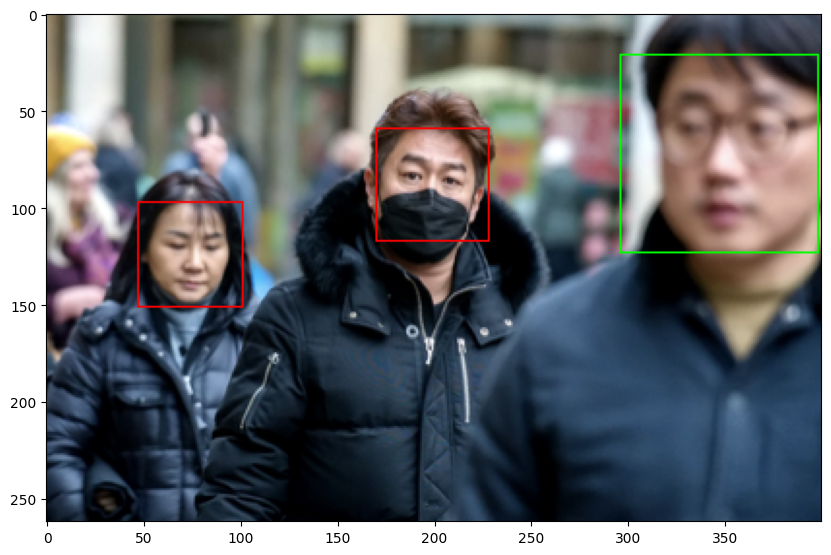

In [ ]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    #colored output image
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        if label[i]==1:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),1)
        else:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)

else:
    print("No. of faces detected is less than 2")

#### Red box shows violation of social distancing.

### Using VGG19 for mask detection


In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset
!unzip /content/face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [ ]:
#Load train and test set
train_dir = '/content/Face Mask Dataset/Train'
test_dir = '/content/Face Mask Dataset/Test'
val_dir = '/content/Face Mask Dataset/Validation'

In [ ]:
# Data augmentation
# CNN algorithm

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2, shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(128, 128), class_mode='categorical', batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = val_datagen.flow_from_directory(directory=val_dir, target_size=(128, 128), class_mode='categorical', batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(directory=test_dir, target_size=(128, 128), class_mode='categorical', batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


### Building VGG19 transfer learning model.

In [ ]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 2)                 16386     
                                                                 
Total params: 20040770 (76.45 MB)
Trainable params: 16386 (64.01 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [ ]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=len(train_generator)//32,
                              epochs=20,validation_data=val_generator,
                              validation_steps=len(val_generator)//32)

<ipython-input-17-71cc3d49c955>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/20
9/9 [==============================] - 67s 7s/step - loss: 0.5671 - accuracy: 0.7083
Epoch 2/20
9/9 [==============================] - 66s 7s/step - loss: 0.2722 - accuracy: 0.8889
Epoch 3/20
9/9 [==============================] - 64s 7s/step - loss: 0.1686 - accuracy: 0.9340
Epoch 4/20
9/9 [==============================] - 64s 7s/step - loss: 0.1439 - accuracy: 0.9444
Epoch 5/20
9/9 [==============================] - 64s 7s/step - loss: 0.1335 - accuracy: 0.9514
Epoch 6/20
9/9 [==============================] - 60s 7s/step - loss: 0.1094 - accuracy: 0.9669
Epoch 7/20
9/9 [==============================] - 63s 7s/step - loss: 0.0998 - accuracy: 0.9653
Epoch 8/20
9/9 [==============================] - 64s 7s/step - loss: 0.0684 - accuracy: 0.9792
Epoch 9/20
9/9 [==============================] - 64s 7s/step - loss: 0.0863 - accuracy: 0.9722
Epoch 10/20
9/9 [==============================] - 63s 7s/step - loss: 0.0938 - accuracy: 0.9722
Epoch 11/20
9/9 [======================

In [ ]:
model.evaluate_generator(test_generator)

<ipython-input-18-faa0e9406f88>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator)


[0.057749904692173004, 0.9825000166893005]

Our model achieved 98% accuracy on test data.

### Testing the model on the test data

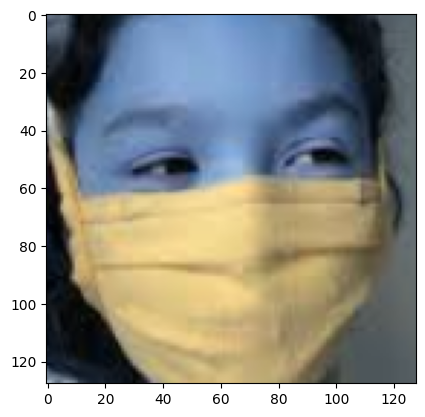

In [ ]:
sample_mask_img = cv2.imread('/content/Face Mask Dataset/Test/WithMask/1565.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [ ]:
model.predict(sample_mask_img)

1/1 [==============================] - 0s 401ms/step


array([[0.9864117 , 0.03597363]], dtype=float32)

The model is able to classify if the person is wearing a mask or not.

### Save the model.

In [ ]:
model.save('masknet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Integrating with haar cascade

We now take crops of the faces detected in the image and use the model trained in the above section to determine whether the individual faces have a mask or not.

In [ ]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

1/1 [==============================] - 0s 218ms/step


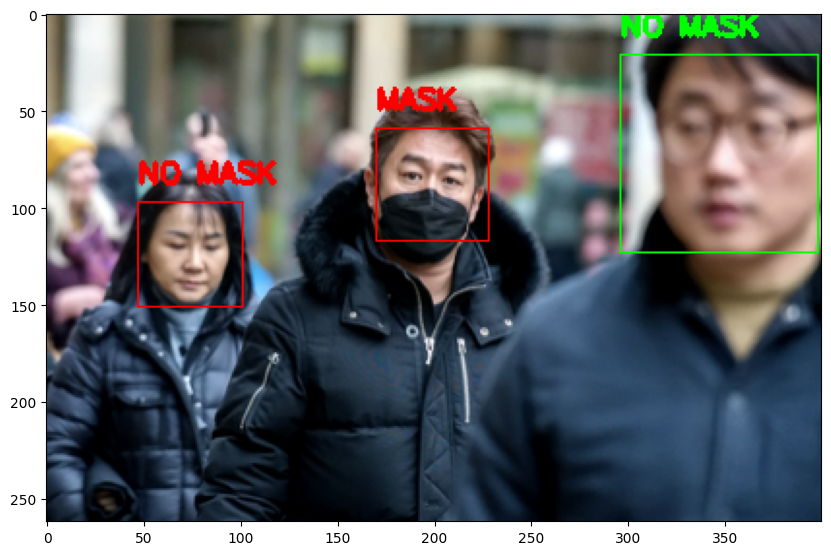

In [ ]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)

else:
    print("No. of faces detected is less than 2")

#### Red boxes shows violation of social distancing.